# Olympic Game Data Analysis
Dataset source: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline 

In [3]:
#Load dataset
athlete = pd.read_csv('./Data/athlete_events.csv')
region = pd.read_csv('./Data/noc_regions.csv')

In [4]:
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [92]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
#Merge two datasets
df = athlete.merge(region, how = 'left', on = 'NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


The two new region and notes column names are not consistent to others.

In [6]:
#Rename columns
df.rename(columns={'region':'Region','notes':'Notes'}, inplace=True)

In [7]:
#Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [96]:
#Infomation about numerical data
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


It can be seen that this dataset contains data from 1960-2016.

In [8]:
#Check null values
null_columns = df.isna().any()
null_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [9]:
#Columns names containing null values or missing values
nul_col = df.isnull().sum().to_frame()
print(list(nul_col.loc[nul_col[0]==0].index))

['ID', 'Name', 'Sex', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event']


In [10]:
#United States details
df.query('Team == "United States"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN


In [107]:
# Top 10 country participating Olympic since 1960
top_10_countries = df.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

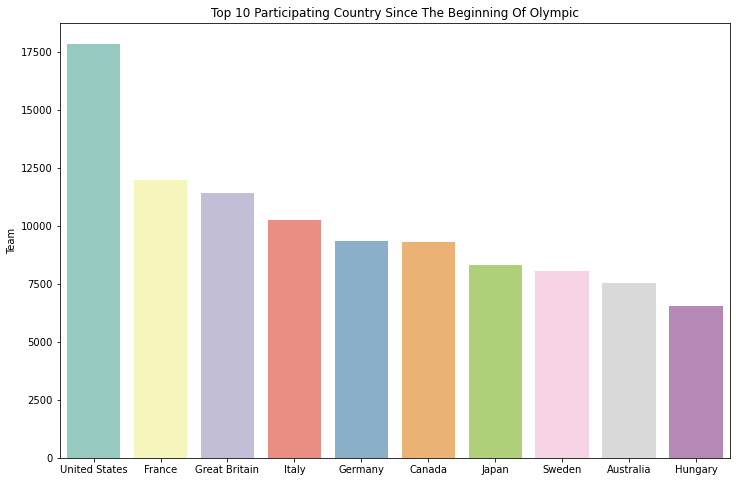

In [117]:
#Plot top 10 country participating Olympic since 1960
plt.figure(figsize=(12,8))
plt.title('Top 10 Participating Country Since The Beginning Of Olympic')
sns.barplot(x=top_10_countries.index,y=top_10_countries,palette='Set3');

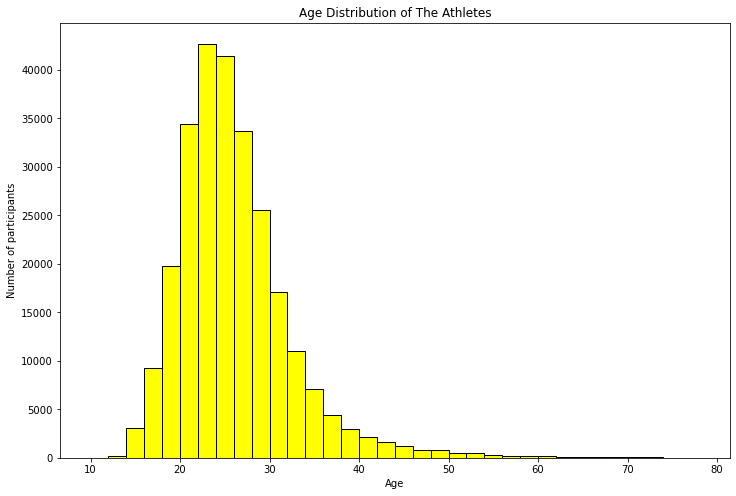

In [125]:
#Age Distribution of the participants
plt.figure(figsize=(12,8))
plt.title('Age Distribution of The Athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(df.Age, bins = np.arange(10,80,2), color='yellow',edgecolor='black');

*Conclusion: Most number of athletes have age between 20 to 30. There is a few athletes who have beyond 40 year of age and even close to 60.*

In [129]:
#Get winter Olympic sports
winter_sports = df[df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [130]:
#Get summer Olympic sports
summer_sports = df[df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

*Conclusion: More number of sports in summer Olympic compare to winter Olympic.*

In [131]:
#Male and Female participants
gender_counts = df.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

*Conclusion: Olympic has more male participants than female participants.*

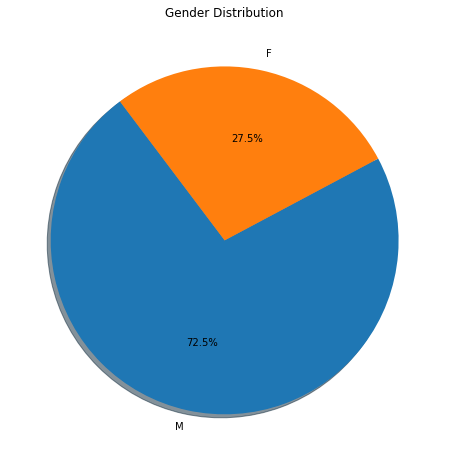

In [139]:
#Plot Male and Female participants use pie plot
plt.figure(figsize=(12,8))
plt.title('Gender Distribution')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=127,shadow=True);

In [140]:
#Total medals
df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

*The number of gold, bronze, silver medals seem to be similar to each other.*

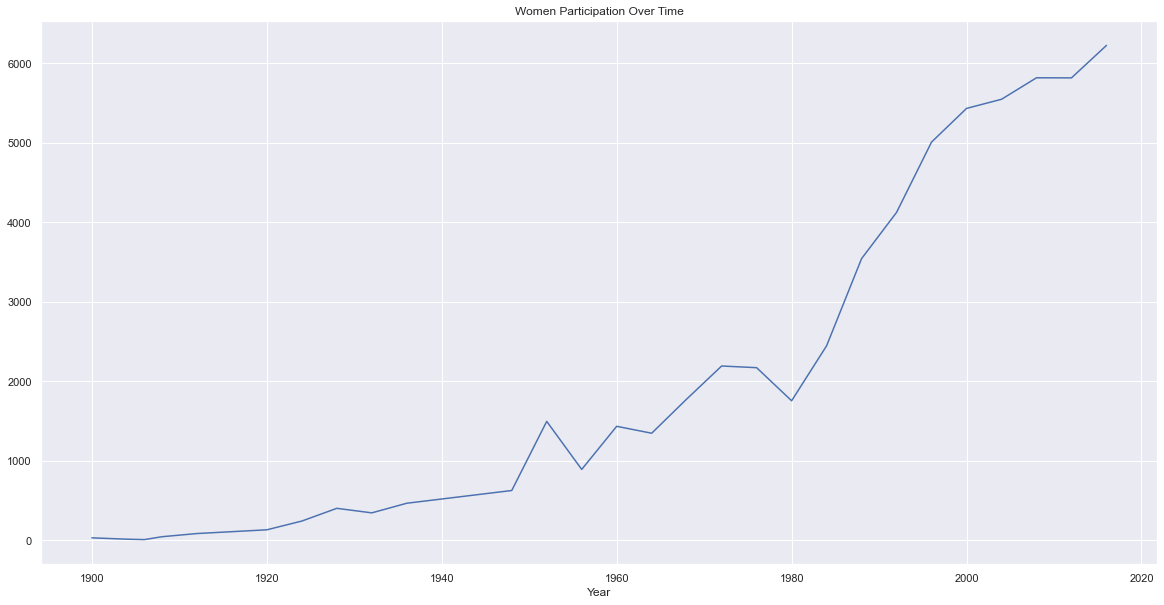

In [165]:
#Total number female athletes in each Olympic.
female_participant = df[(df.Sex=='F') & (df.Season=='Summer')][['Sex','Year']]
female_participant = female_participant.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
plt.title('Women Participation Over Time')
female_participant.loc[:,'F'].plot();


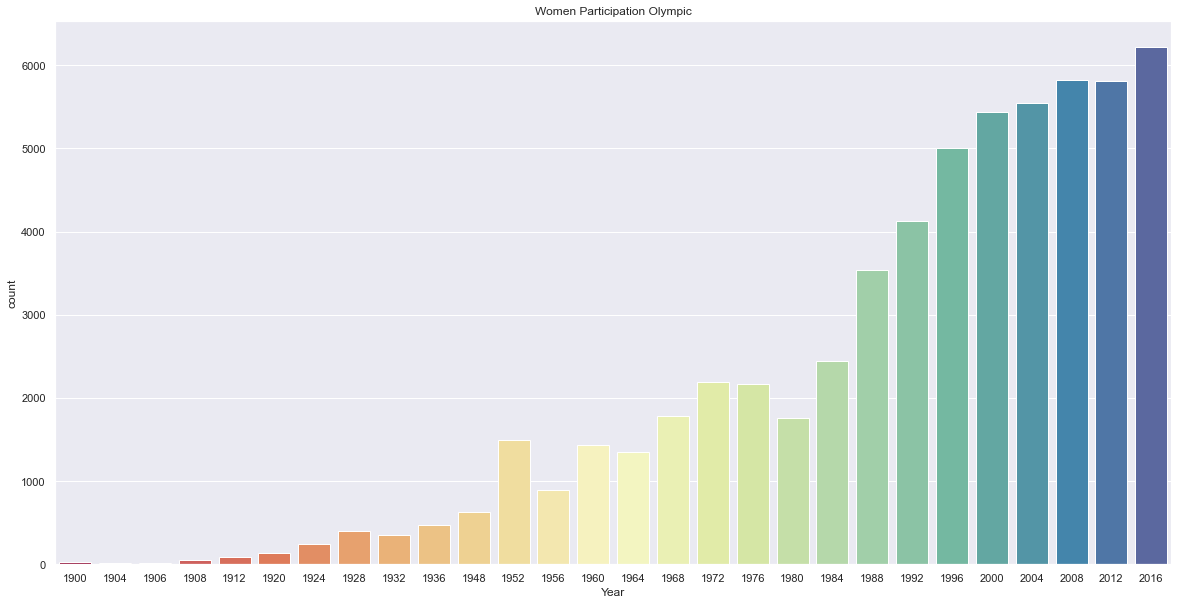

In [153]:
womenOlympic = df[(df.Sex=='F')&(df.Season=='Summer')]
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
plt.title("Women Participation Olympic")
sns.countplot(x='Year',data = womenOlympic, palette="Spectral");

*Conclusion: The number of Olympic women participation had increased gradually since its inception, it decreased slightly in 1960 and 1980 but since then it rised significantly over the year.*

In [12]:
#Gold medal athletes
goldMedals = df[(df['Medal'] == 'Gold')]
goldMedals.shape

(13372, 17)

In [13]:
#Remove NaN values
goldMedals = goldMedals[np.isfinite(goldMedals.Age)]
goldMedals.shape

(13224, 17)

In [14]:
#Number of athletes achieving a gold medal whose age is more than 60 years.
gold_60_arr = goldMedals[['Sport','Team']][goldMedals['Age']>60].reset_index()
print("\033[1m" + 'There are {} athletes achieving a gold medal whose age is more than 60 years.'.format(len(gold_60_arr)) + "\033[0;0m")
print(gold_60_arr)

There are 6 athletes achieving a gold medal whose age is more than 60 years.
    index             Sport                Team
0  104003  Art Competitions         Netherlands
1  105199             Roque       United States
2  190952           Archery  Cincinnati Archers
3  226374           Archery     Potomac Archers
4  233390          Shooting              Sweden
5  261102           Archery     Potomac Archers


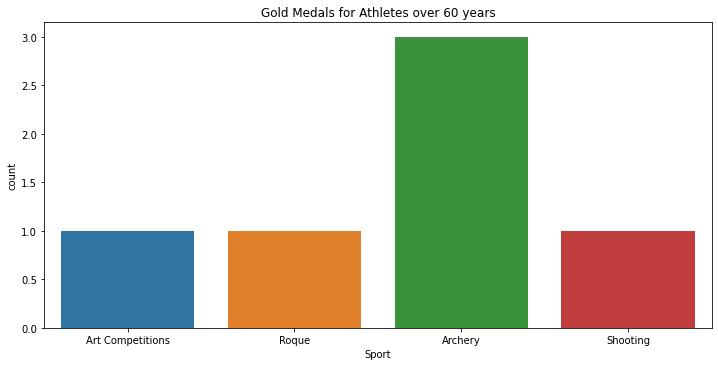

In [15]:
#Plot number of athletes achieving a gold medal whose age is more than 60 years.
gold_60_arr = goldMedals['Sport'][goldMedals['Age']>60]
plt.figure(figsize=(10,5))
plt.title("Gold Medals for Athletes over 60 years")
plt.tight_layout()
sns.countplot(gold_60_arr);

In [34]:
#Gold medals of each country
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(10)

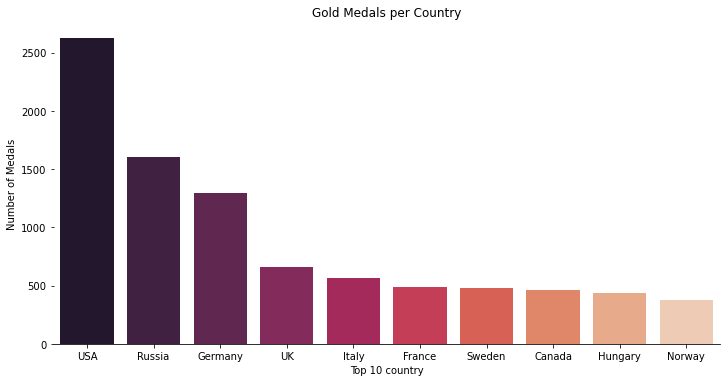

In [33]:
#PLot gold medals of each country
visualize_gm = sns.catplot(x="index",y="Medal",data = totalGoldMedals, height = 5, aspect=2, kind = "bar", palette = "rocket")
visualize_gm.despine(left=True)
visualize_gm.set_xlabels("Top 10 country")
visualize_gm.set_ylabels("Number of Medals")
plt.title("Gold Medals per Country");

*Conclusion: USA has the most number of gold medals*

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64


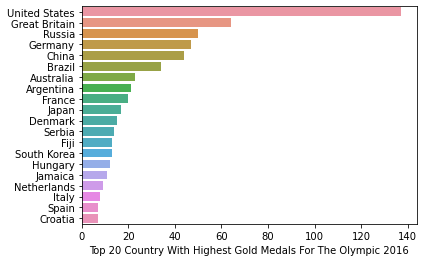

In [47]:
#Rio Olympic
team_names = df[(df.Year == df.Year.max()) & (df.Medal == "Gold")].Team
sns.barplot(x=team_names.value_counts().head(20), y=team_names.value_counts().head(20).index)
plt.xlabel("Top 20 Country With Highest Gold Medals For The Olympic 2016")
print(team_names.value_counts().head(10))

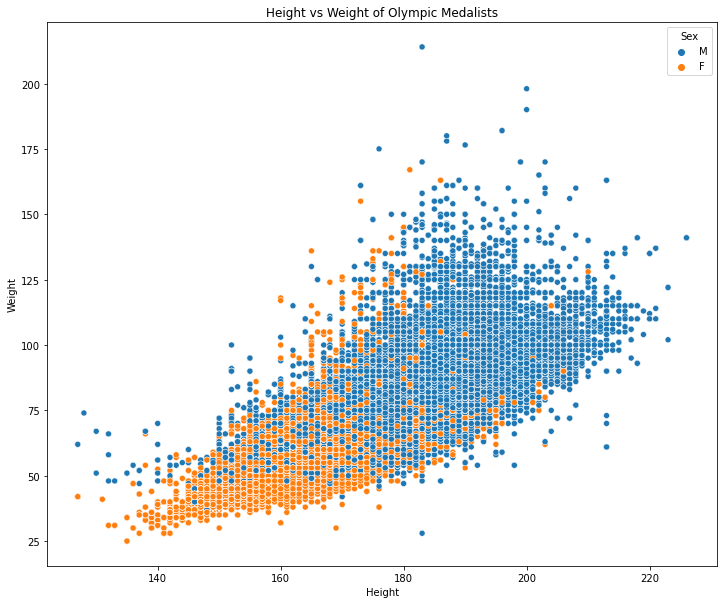

In [53]:
#Plot height and weight of each participant who has medal
not_null_hw = df[(df.Height.notnull()) & (df.Weight.notnull())]
plt.figure(figsize=(12,10))
axis = sns.scatterplot(x="Height", y="Weight", data = not_null_hw, hue="Sex")
plt.title("Height vs Weight of Olympic Medalists");